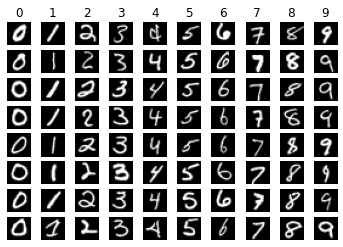

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       0.54      0.94      0.69       164
           1       0.71      0.94      0.81       152
           2       0.83      0.50      0.62       155
           3       0.83      0.53      0.65       154
           4       0.75      0.31      0.44       143
           5       0.67      0.16      0.25       141
           6       0.81      0.85      0.83       143
           7       0.83      0.82      0.83       158
           8       0.41      0.64      0.50       132
           9       0.60      0.84      0.70       158

    accuracy                           0.66      1500
   macro avg       0.70      0.65      0.63      1500
weighted avg       0.70      0.66      0.64      1500


Confusion matrix SKLearn GNB:
[[154   0   6   0   1   1   0   0   1   1]
 [  1 143   1   0   0   1   0   1   3   2]
 [ 11   6  77  10   2   1  19   1  27   1]
 [ 32  11   5  82   0   0   2   3  12   7]
 [ 

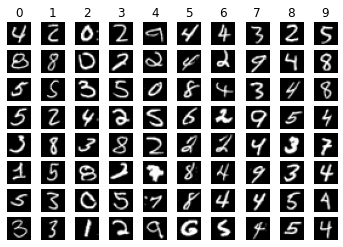

In [1]:
from sklearn import metrics, datasets
from sklearn.naive_bayes import GaussianNB
from Handout_MNIST import MNIST
import math
import numpy as np

# load the MNIST_Light data
mnist = MNIST.MNISTData('Handout_MNIST/MNIST_Light/*/*.png')

# get_data() produces the subsets with already normalised (between 0.0 and 1.0) data
train_features, test_features, train_labels, test_labels = mnist.get_data()

# just show some of the images
mnist.visualize_random()

gnb = GaussianNB()
gnb.fit(train_features, train_labels)
y_pred = gnb.predict(test_features)

print("Classification report SKLearn GNB:\n%s\n"
  % (metrics.classification_report(test_labels, y_pred)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(test_labels, y_pred))

# show the first 8 (or less) wrongly classified images for each class
mnist.visualize_wrong_class(y_pred, 8)



In [2]:
digits = datasets.load_digits()

num_examples = len(digits.data)
training_length = int(0.7*num_examples)

train_features = digits.data[:training_length]
train_labels =  digits.target[:training_length]
test_features = digits.data[training_length:]
test_labels = digits.target[training_length:]

#print("train_features: ", train_features)
#print("train_labels: ", train_labels)
#print("test_features: ", test_features)
#print("test_labels: ", test_labels)

gnb2 = GaussianNB()
gnb2.fit(train_features, train_labels)
y_pred = gnb2.predict(test_features)

print("Classification report SKLearn GNB:\n%s\n"
  % (metrics.classification_report(test_labels, y_pred)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(test_labels, y_pred))

# show the first 8 (or less) wrongly classified images for each class
#mnist.visualize_wrong_class(y_pred, 8)

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.65      0.79      0.71        53
           2       0.98      0.81      0.89        53
           3       0.92      0.64      0.76        53
           4       1.00      0.86      0.92        57
           5       0.83      0.93      0.87        56
           6       0.96      0.98      0.97        54
           7       0.73      0.83      0.78        54
           8       0.59      0.71      0.64        52
           9       0.82      0.73      0.77        55

    accuracy                           0.83       540
   macro avg       0.84      0.82      0.83       540
weighted avg       0.84      0.83      0.83       540


Confusion matrix SKLearn GNB:
[[51  0  0  0  0  0  0  0  2  0]
 [ 0 42  1  0  0  0  0  0  3  7]
 [ 0  5 43  1  0  0  1  0  1  2]
 [ 0  3  0 34  0  3  0  2 11  0]
 [ 1  0  0  0 49  0  0  6  1  0]
 [ 0  2  0

In [37]:
class NBC():
    def __init__(self, image_size, intensity_levels, normalize):
        self.normalize = normalize
        self.image_size = image_size
        self.intensity_levels = intensity_levels
        self.pixel_mat = np.full((self.image_size,10,self.intensity_levels), 0)
    def fit(self, train_features, train_labels):
        for i, image in enumerate(train_features):
            for j, pixel in enumerate(train_features[i]):
                #print(int(256*pixel))
                self.pixel_mat[j][train_labels[i]][int(self.normalize*pixel)] += 1
    def predict(self, test_features):
        counts = np.bincount(train_labels)
        countsProb = counts / len(train_labels)
        result_list = [0] * len(test_features)
        #counter = 0
        for i, image in enumerate(test_features):
            bestT = 0
            match = 0
            for label in range(10):
                t = countsProb[label]
                for j, pixel in enumerate(test_features[i]):
                    #counter += 1
                    t *= self.pixel_mat[j][label][int(self.normalize*pixel)] / counts[label]
                if t > bestT:
                    bestT = t
                    match = label
            
            result_list[i] = match
            
        #print(counter)
        return result_list

In [38]:
nbc = NBC(64,17,1)

num_examples = len(digits.data)
training_length = int(0.7*num_examples)

train_features = digits.data[:training_length]
train_labels =  digits.target[:training_length]
test_features = digits.data[training_length:]
test_labels = digits.target[training_length:]

nbc.fit(train_features, train_labels)
y_pred = nbc.predict(test_features)

print("Classification report SKLearn NBC:\n%s\n"
  % (metrics.classification_report(test_labels, y_pred)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(test_labels, y_pred))

Classification report SKLearn NBC:
              precision    recall  f1-score   support

           0       0.24      1.00      0.39        53
           1       0.84      0.51      0.64        53
           2       1.00      0.36      0.53        53
           3       1.00      0.58      0.74        53
           4       0.95      0.65      0.77        57
           5       0.88      0.52      0.65        56
           6       1.00      0.65      0.79        54
           7       0.86      0.59      0.70        54
           8       0.72      0.65      0.69        52
           9       0.75      0.65      0.70        55

    accuracy                           0.62       540
   macro avg       0.83      0.62      0.66       540
weighted avg       0.83      0.62      0.66       540


Confusion matrix SKLearn GNB:
[[53  0  0  0  0  0  0  0  0  0]
 [20 27  0  0  1  0  0  0  3  2]
 [28  0 19  0  0  0  0  0  5  1]
 [13  0  0 31  0  3  0  1  3  2]
 [20  0  0  0 37  0  0  0  0  0]
 [19  2  0

In [5]:
nbcMNIST = NBC(400, 17, 16)
train_features, test_features, train_labels, test_labels = mnist.get_data()

nbcMNIST.fit(train_features, train_labels)
y_pred = nbcMNIST.predict(test_features)

print("Classification report SKLearn NBC:\n%s\n"
  % (metrics.classification_report(test_labels, y_pred)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(test_labels, y_pred))

Classification report SKLearn NBC:
              precision    recall  f1-score   support

           0       0.30      0.91      0.46       164
           1       0.99      0.78      0.87       152
           2       0.67      0.48      0.56       155
           3       0.71      0.48      0.57       154
           4       0.86      0.52      0.65       143
           5       0.61      0.52      0.56       141
           6       0.95      0.73      0.82       143
           7       0.96      0.55      0.70       158
           8       0.69      0.70      0.69       132
           9       0.76      0.63      0.69       158

    accuracy                           0.63      1500
   macro avg       0.75      0.63      0.66      1500
weighted avg       0.75      0.63      0.66      1500


Confusion matrix SKLearn GNB:
[[150   0   6   0   0   4   0   0   4   0]
 [  4 118   3   1   0  12   0   0  13   1]
 [ 62   0  75   8   0   2   2   0   6   0]
 [ 52   0  14  74   2   4   0   0   6   2]
 [ 

In [34]:
class NGNBC():
    def __init__(self, image_size):
        self.image_size = image_size
        self.variances = np.full((self.image_size,10,2),0)
        self.means = np.full((self.image_size,10,2),0)
    def fit(self, train_features, train_labels):
        counts = np.bincount(train_labels)
        self.countsProb = counts / len(train_labels)
        for i, image in enumerate(train_features):
            for j, pixel in enumerate(train_features[i]):
                self.means[j][train_labels[i]][0] += pixel
                self.means[j][train_labels[i]][1] += 1
        for i in range(self.image_size):
            for j in range(10):
                self.means[i][j][0] = self.means[i][j][0] / self.means[i][j][1] 

        for i, image in enumerate(train_features):
            for j, pixel in enumerate(train_features[i]):
                self.variances[j][train_labels[i]][0] += np.power((self.means[j][train_labels[i]][0] - pixel),2)
                self.variances[j][train_labels[i]][1] += 1
        for i in range(self.image_size):
            for j in range(10):
                self.variances[i][j][0] = self.variances[i][j][0] / self.variances[i][j][1]  
    def predict(self, test_features):
        result_list = [0] * len(test_features)
        for i, image in enumerate(test_features):
            bestT = -math.inf
            #bestT = 0
            match = 0
            for label in range(10):
                t = self.countsProb[label]
                for j, pixel in enumerate(test_features[i]):
                    t += self.pdf(self.means[j][label][0], self.variances[j][label][0], pixel) #/ counts[label]
                #print(t)
                if t > bestT:
                    bestT = t
                    match = label
            result_list[i] = match
        return result_list
    def pdf(self, mean, var, x):
        var += 0.001
        term1 = 1/ np.sqrt(2*np.pi*var)
        exponent = (-(1/(2*var)))*(np.power((x - mean),2))
        #return term1*np.exp(exponent)
        return exponent - (0.5 * np.log(2*np.pi*var))

In [35]:
#SKLEARN
gnb4 = NGNBC(64)

digits = datasets.load_digits()

num_examples = len(digits.data)
training_length = int(0.7*num_examples)

train_features = digits.data[:training_length]
train_labels =  digits.target[:training_length]
test_features = digits.data[training_length:]
test_labels = digits.target[training_length:]

gnb4.fit(train_features, train_labels)
#y_pred = gnb4.predict(test_features)
y_pred = gnb4.predict(train_features)
print("y_pred: ", y_pred)

print("Classification report SKLearn GNBC:\n%s\n"
#  % (metrics.classification_report(test_labels, y_pred)))
#print("Confusion matrix SKLearn GNBC:\n%s" % metrics.confusion_matrix(test_labels, y_pred))
  % (metrics.classification_report(train_labels, y_pred)))
print("Confusion matrix SKLearn GNBC:\n%s" % metrics.confusion_matrix(train_labels, y_pred))


y_pred:  [0, 1, 8, 3, 4, 9, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 1, 0, 1, 2, 3, 4, 5, 8, 4, 8, 1, 0, 1, 5, 5, 6, 5, 0, 9, 8, 3, 2, 4, 1, 7, 7, 3, 2, 1, 0, 0, 8, 8, 7, 8, 8, 0, 1, 8, 8, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 8, 1, 5, 5, 3, 5, 2, 2, 8, 0, 0, 1, 7, 6, 3, 2, 1, 7, 5, 6, 3, 1, 3, 9, 1, 7, 8, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 7, 7, 2, 8, 8, 8, 5, 7, 9, 8, 4, 1, 8, 4, 9, 0, 8, 9, 8, 0, 9, 2, 3, 4, 5, 8, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 5, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 1, 1, 2, 6, 3, 3, 5, 3, 3, 4, 6, 6, 5, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 5, 1, 7, 8, 3, 2, 8, 7, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 9, 5, 9, 6, 1, 7, 5, 5, 4, 7, 2, 8, 2, 2, 5, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 7, 6, 7, 8, 8, 0, 8, 2, 3, 7, 5, 5, 7, 8, 9, 0, 9, 5, 5, 8, 5, 0, 9, 8, 9, 8, 4, 8, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 7, 6, 5, 6, 7, 7, 1, 5, 0, 7, 

In [36]:
# MNIST
gnb5 = NGNBC(400)
train_features, test_features, train_labels, test_labels = mnist.get_data()
train_features = train_features 
test_features = test_features 
gnb5.fit(train_features, train_labels)
y_pred = gnb5.predict(test_features)

print("Classification report SKLearn GNBC:\n%s\n"
  % (metrics.classification_report(test_labels, y_pred)))
print("Confusion matrix SKLearn GNBC:\n%s" % metrics.confusion_matrix(test_labels, y_pred))

Classification report SKLearn GNBC:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       164
           1       0.00      0.00      0.00       152
           2       0.00      0.00      0.00       155
           3       0.00      0.00      0.00       154
           4       0.00      0.00      0.00       143
           5       0.00      0.00      0.00       141
           6       0.00      0.00      0.00       143
           7       0.00      0.00      0.00       158
           8       0.09      1.00      0.16       132
           9       0.00      0.00      0.00       158

    accuracy                           0.09      1500
   macro avg       0.01      0.10      0.02      1500
weighted avg       0.01      0.09      0.01      1500


Confusion matrix SKLearn GNBC:
[[  0   0   0   0   0   0   0   0 164   0]
 [  0   0   0   0   0   0   0   0 152   0]
 [  0   0   0   0   0   0   0   0 155   0]
 [  0   0   0   0   0   0   0   0 154   0]
 

/home/filip/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/filip/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/filip/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
